In [2]:
from qutip import fock, ket, bra, thermal_dm, basis
import matplotlib.pyplot as plt
import numpy as np 
from scipy.constants import epsilon_0

$$U(z)=\sum_i \left(-\frac{1}{2}\alpha_2 z_i^2+\frac{1}{4}\alpha_4 z_i^4 \right)+\sum_{j>i}\frac{e^2}{4\pi\epsilon_0\left|z_i-z_j\right|}$$

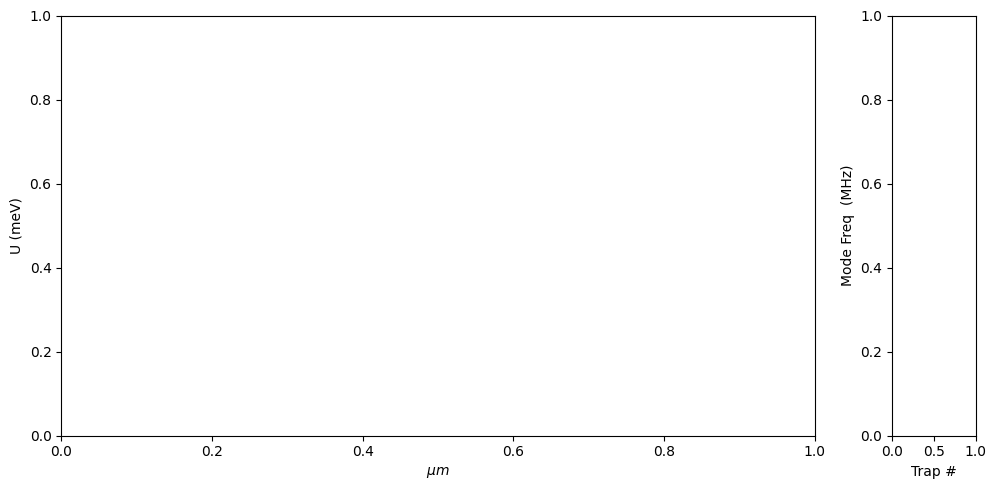

In [5]:
fig,ax=plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [9,1]})
ax[0].set_xlabel(r'$\mu m$')
ax[0].set_ylabel('U (meV)')

ax[1].set_xlabel('Trap #')
ax[1].set_ylabel('Mode Freq  (MHz)')
plt.tight_layout()

Average Ion Spacing: 5.249875697024897 mum


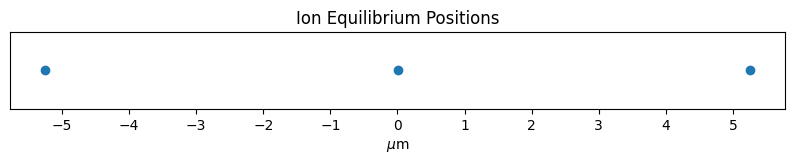

In [172]:
import plotly
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import elementary_charge, epsilon_0, electron_volt

m = 170.936323 * 1.66054e-27 

l_0=5.25 # arbitrary
gamma_4= 3.5 # arbitrary
z_i=np.linspace(-100,100,1000)*1e-6
def V(u):
    harm=0
    for i in u: harm+=-.5*(i**2)+.25*gamma_4*(i**4)

    interaction=0
    for i in u:
        for j in u:
            if i!=j: interaction+=1/np.abs(i-j)
    return harm+interaction

N=3
z_pos=minimize(V, np.linspace(-5,5,N), method='COBYLA').x*l_0*1e-6
avg_dist=np.sum([np.abs(z_pos[i+1]-z_pos[i]) for i in range(N-1)])/(N-1)

print(f'Average Ion Spacing: {avg_dist*1e6} mum')
plt.figure(figsize=(10,1))
plt.title('Ion Equilibrium Positions')
plt.scatter(z_pos*1e6, np.zeros((N,)))
plt.tick_params(left=False, labelleft=False)
plt.xticks(np.arange(-5,6,1))
plt.xlabel(r'$\mu$m')
plt.show()

In [196]:
N=3
def get_normal_modes():
    d2U_dx2=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i!=j: d2U_dx2[i][j]=m*(w_x**2)-((elementary_charge**2)/(4*np.pi*epsilon_0))/(np.abs(z_pos[i]-z_pos[j])**3)
    return np.linalg.eig(d2U_dx2)
w_x=2e6
eig_vals, norm_transv_modes = get_normal_modes()
norm_transv_modes

array([[-6.29427609e-01,  7.07072541e-01,  3.22287617e-01],
       [ 4.55637191e-01, -1.39604131e-04,  8.90165563e-01],
       [-6.29456619e-01, -7.07141006e-01,  3.22080676e-01]])

In [168]:
alpha_2=(elementary_charge**2)/(4*np.pi*epsilon_0*(l_0**3))
alpha_4=(gamma_4*alpha_2)/(l_0**2)

2.0245743059715663e-31

In [176]:
list(range(N))

[0, 1, 2]

In [33]:
epsilon_0

8.8541878128e-12